# Data Preprocessing

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_data = pd.read_csv("data/Speed Dating Data.csv")
df_data.shape

(8378, 195)

In [11]:
cols = ['iid',  'pid', 'match','gender',
        'age', 'race', 'field_cd', 'date', 'go_out', 'age_o', 'race_o']

df_selected = df_data.loc[:, cols]

# Separate dataframe into male and female.
df_male = df_selected.loc[ df_selected['gender'] == 1 ]
df_female = df_selected.loc[ df_selected['gender'] == 0 ]

# Select columns we want from female's dataframe.
attr3 = ['iid', 'field_cd', 'date', 'go_out']
df_female = df_female.loc[:, attr3]

# Drop duplicated Index from female's dataframe.
df_female.drop_duplicates('iid', inplace=True)

# Let's make dataframe for matching. (empty yet)
df_match = pd.DataFrame( data = None, columns = cols + ['field_cd_o', 'date_o', 'go_out_o'] )
index = 0

# Let's fill each rows of dataframe for matching.
for m_index, m_row in df_male.iterrows() :
    pid = m_row['pid']
    
#     Find partner id in female group corresponding to each row.
    for f_index, f_row in df_female.iterrows() :
        if pid == f_row['iid'] :
            
#           Extract values from each row of dataframes.
            values = list(m_row.values) + list(f_row.values[1:])
    
#           Fill a row of match dataframe
            df_match.loc[index] = values
            index += 1
            
            break
    
df_match.head()

,iid,pid,match,gender,age,race,field_cd,date,go_out,age_o,race_o,field_cd_o,date_o,go_out_o
0,11.0,1.0,0.0,1.0,27.0,2.0,8.0,5.0,4.0,21.0,4.0,1.0,7.0,1.0
1,11.0,2.0,0.0,1.0,27.0,2.0,8.0,5.0,4.0,24.0,2.0,1.0,5.0,1.0
2,11.0,3.0,0.0,1.0,27.0,2.0,8.0,5.0,4.0,25.0,2.0,2.0,3.0,1.0
3,11.0,4.0,0.0,1.0,27.0,2.0,8.0,5.0,4.0,23.0,2.0,1.0,5.0,1.0
4,11.0,5.0,0.0,1.0,27.0,2.0,8.0,5.0,4.0,21.0,2.0,1.0,4.0,1.0


In [12]:
from sklearn.utils import shuffle

cols = ['iid',  'pid', 'match','gender',
        'age', 'race', 'field_cd', 'date', 'go_out', 'age_o', 'race_o', 'field_cd_o', 'date_o', 'go_out_o']

new_data=df_match.dropna(subset=cols)
new_data = shuffle(new_data)

# Data Separation
we are using K-fold.

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = ['age', 'race', 'field_cd', 'date', 'go_out', 'age_o', 'race_o', 'field_cd_o', 'date_o', 'go_out_o']
Y = ['match']

train_1, test_1 = train_test_split(new_data, test_size=0.2,random_state=0)

data_X = train_1[X]
data_Y = train_1[Y]
    
test_X = test_1[X]
test_Y = test_1[Y]

kf = KFold(n_splits=4, random_state=1)

# Learning

### Decsion Tree

0.7116336633663366


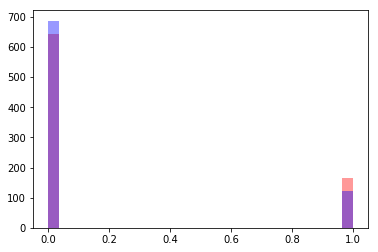

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model=DecisionTreeClassifier()

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train]
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    model.fit(train_data_X, train_data_Y)
    
prediction = model.predict(test_X)
print(metrics.accuracy_score(prediction, test_Y))

# comparison visualzaition
sns.distplot(prediction, hist = True, kde = False, label="prediction", color='red')
sns.distplot(test_Y, hist = True, kde = False, label="actual value", color='blue')

### SVM - linear

0.8502475247524752


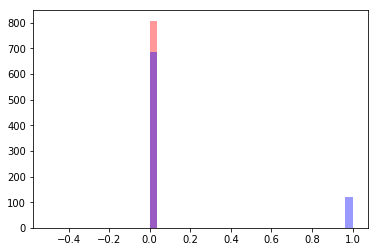

In [22]:
from sklearn import svm
svc_l = svm.SVC(kernel='linear')

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_l.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(accuracy)

prediction = svc_l.predict(test_X)

# comparison visualzaition
sns.distplot(prediction, hist = True, kde = False, label="prediction", color='red')
sns.distplot(test_Y, hist = True, kde = False, label="actual value", color='blue')

### SVM - rbf

0.8502475247524752


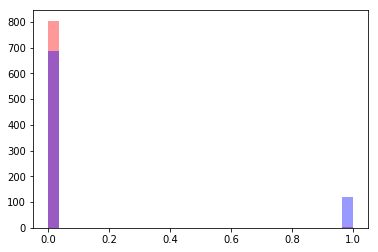

In [20]:
from sklearn import svm
svc_r = svm.SVC(kernel='rbf')

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_r.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(accuracy)

prediction = svc_r.predict(test_X)

# comparison visualzaition
sns.distplot(prediction, hist = True, kde = False, label="prediction", color='red')
sns.distplot(test_Y, hist = True, kde = False, label="actual value", color='blue')

### KNN

0.8316831683168316


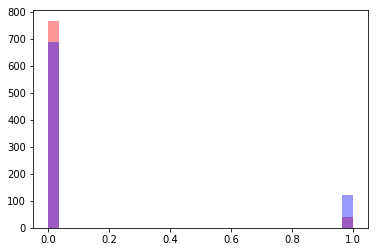

In [23]:
from sklearn import neighbors

model = neighbors.KNeighborsClassifier()

for i, (train, test) in enumerate(kf.split(train_1)):
    #print(test)
    train_data_X = np.array(data_X)[train]
    #print(train_data_X)
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    model.fit(train_data_X, train_data_Y)
    
accuracy = model.score(test_X, test_Y)
print(accuracy)

prediction = model.predict(test_X)

# comparison visualzaition
sns.distplot(prediction, hist = True, kde = False, label="prediction", color='red')
sns.distplot(test_Y, hist = True, kde = False, label="actual value", color='blue')

# Categorical values processing
from now on, we are using dummy value for categroical values.

In [25]:
df_match_1=df_match.copy()

field_hot=pd.get_dummies(df_match['field_cd'])
#df_match_1=df_match_1.drop('field_cd',axis=1)
df_match_1=df_match_1.join(field_hot)
df_match_1.rename(columns={1.0:"field_1", 2.0:"field_2", 3.0:"field_3", 4.0:"field_4",
                          5.0:"field_5", 6.0:"field_6", 7.0:"field_7", 8.0:"field_8", 
                          9.0:"field_9", 10.0:"field_10", 11.0:"field_11", 12.0:"field_12", 
                          13.0:"field_13", 14.0:"field_14", 15.0:"field_15", 16.0:"field_16",
                          17.0:"field_17", 18.0:"field_18", }, inplace=True)

field_o_hot=pd.get_dummies(df_match_1['field_cd_o'])
#df_match_1=df_match.drop('field_cd_o',axis=1)
df_match_1=df_match_1.join(field_o_hot)
df_match_1.rename(columns={1.0:"field_1_o", 2.0:"field_2_o", 3.0:"field_3_o", 4.0:"field_4_o",
                          5.0:"field_5_o", 6.0:"field_6_o", 7.0:"field_7_o", 8.0:"field_8_o", 
                          9.0:"field_9_o", 10.0:"field_10_o", 11.0:"field_11_o", 12.0:"field_12_o", 
                          13.0:"field_13_o", 14.0:"field_14_o", 15.0:"field_15_o", 16.0:"field_16_o",
                          17.0:"field_17_o", 18.0:"field_18_o", }, inplace=True)

race_hot = pd.get_dummies(df_match_1['race'])
#df_match_1 = df_match_1.drop('race', axis=1)
df_match_1 = df_match_1.join(race_hot)
df_match_1.rename(columns={1.0:"race_1", 2.0:"race_2", 3.0:"race_3", 4.0:"race_4", 6.0:"race_5", }, inplace=True)

race_o_hot = pd.get_dummies(df_match_1['race_o'])
#df_match_1 = df_match_1.drop('race_o', axis=1)
df_match_1 = df_match_1.join(race_hot)
df_match_1.rename(columns={1.0:"race_1_o", 2.0:"race_2_o", 3.0:"race_3_o", 4.0:"race_4_o", 6.0:"race_5_o", }, inplace=True)

print(df_match_1.columns.values)
#print (one_hot)

['iid' 'pid' 'match' 'gender' 'age' 'race' 'field_cd' 'date' 'go_out'
 'age_o' 'race_o' 'field_cd_o' 'date_o' 'go_out_o' 'field_1' 'field_2'
 'field_3' 'field_4' 'field_5' 'field_6' 'field_7' 'field_8' 'field_9'
 'field_10' 'field_11' 'field_12' 'field_13' 'field_14' 'field_15'
 'field_16' 'field_17' 'field_18' 'field_1_o' 'field_2_o' 'field_3_o'
 'field_4_o' 'field_5_o' 'field_6_o' 'field_7_o' 'field_8_o' 'field_9_o'
 'field_10_o' 'field_11_o' 'field_13_o' 'field_14_o' 'field_15_o'
 'field_16_o' 'field_18_o' 'race_1' 'race_2' 'race_3' 'race_4' 'race_5'
 'race_1_o' 'race_2_o' 'race_3_o' 'race_4_o' 'race_5_o']


In [26]:
cols = ['age', 'date', 'go_out', 'age_o',
 'date_o', 'go_out_o', 'field_1', 'field_2',
 'field_3', 'field_4', 'field_5', 'field_6', 'field_7', 'field_8', 'field_9',
 'field_10', 'field_11', 'field_12', 'field_13', 'field_14', 'field_15',
 'field_16', 'field_17', 'field_18', 'field_1_o', 'field_2_o', 'field_3_o', 'field_4_o',
 'field_5_o', 'field_6_o', 'field_7_o', 'field_8_o', 'field_9_o', 'field_10_o',
 'field_11_o', 'field_13_o', 'field_14_o', 'field_15_o', 'field_16_o',
 'field_18_o', 'race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_1_o',
 'race_2_o', 'race_3_o', 'race_4_o', 'race_5_o']

new_data=df_match_1.dropna(subset=cols)
new_data = shuffle(new_data)

In [28]:
X=['age', 'date', 'go_out', 'age_o',
 'date_o', 'go_out_o', 'field_1', 'field_2',
 'field_3', 'field_4', 'field_5', 'field_6', 'field_7', 'field_8', 'field_9',
 'field_10', 'field_11', 'field_12', 'field_13', 'field_14', 'field_15',
 'field_16', 'field_17', 'field_18', 'field_1_o', 'field_2_o', 'field_3_o', 'field_4_o',
 'field_5_o', 'field_6_o', 'field_7_o', 'field_8_o', 'field_9_o', 'field_10_o',
 'field_11_o', 'field_13_o', 'field_14_o', 'field_15_o', 'field_16_o',
 'field_18_o', 'race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_1_o',
 'race_2_o', 'race_3_o', 'race_4_o', 'race_5_o']
Y=['match']

train_1,  test_1 = train_test_split(new_data, test_size=0.2,random_state=0)

data_X=train_1[X]
data_Y=train_1[Y]
    
test_X=test_1[X]
test_Y=test_1[Y]

kf = KFold(n_splits=4, random_state=1)
#new_data.head()

### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model=DecisionTreeClassifier()

for i, (train, test) in enumerate(kf.split(train_1)):
    train_data_X = np.array(data_X)[train]
    train_data_Y = np.array(data_Y)[train]
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test]
    model.fit(train_data_X, train_data_Y)
    
prediction = model.predict(test_X)
print(metrics.accuracy_score(prediction, test_Y))

0.7068965517241379


### SVM - linear

In [30]:
from sklearn import svm
svc_r = svm.SVC(kernel='linear')

for i, (train, test) in enumerate(kf.split(train_1)):
    train_data_X = np.array(data_X)[train]
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_r.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(accuracy)

0.8263546798029556


### KNN

In [31]:
from sklearn import neighbors

model = neighbors.KNeighborsClassifier()

for i, (train, test) in enumerate(kf.split(train_1)):
    train_data_X = np.array(data_X)[train]
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    model.fit(train_data_X, train_data_Y)
    
accuracy = model.score(test_X, test_Y)
print(accuracy)

0.7992610837438424


### SVM

In [32]:
from sklearn import svm
svc_r = svm.SVC(kernel='rbf')

for i, (train, test) in enumerate(kf.split(train_1)):
    train_data_X = np.array(data_X)[train]
    train_data_Y = np.array(data_Y)[train].ravel()
    test_data_X = np.array(data_X)[test]
    test_data_Y = np.array(data_Y)[test].ravel()
    svc_r.fit(train_data_X, train_data_Y)

accuracy = svc_r.score(test_X, test_Y)
print(accuracy)

0.8263546798029556
